# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:
# import libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`

In [2]:
# define data's path
path = 'Employee.csv'

In [3]:
# read file with read_csv() pandas' method
employee = pd.read_csv(path)

In [4]:
# check if data was correctly imported
employee.head()

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55


In [5]:
# check data's shape
employee.shape

(9, 7)

In [6]:
# check data's info()
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
Name          9 non-null object
Department    9 non-null object
Education     9 non-null object
Gender        9 non-null object
Title         9 non-null object
Years         9 non-null int64
Salary        9 non-null int64
dtypes: int64(2), object(5)
memory usage: 632.0+ bytes


#### What's the mean salary by department. 
##### Tip : There are 2 ways to do it - one way is with and the other way is without pivot tables. Do it both ways. 


* Methods to reshape data: https://nikgrozev.com/2015/07/01/reshaping-in-pandas-pivot-pivot-table-stack-and-unstack-explained-with-pictures/

In [7]:
# Method 1: groupby()
employee.groupby('Department')['Salary'].mean()

Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64

In [8]:
# Method 2: pivot_table()
employee.pivot_table(index='Department', 
                     values='Salary',
                    aggfunc=['mean'])

,mean
,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


##### What is a pivot table?


![title](https://pbpython.com/images/pivot-table-datasheet.png)

[Source](https://pbpython.com/pandas-pivot-table-explained.html)

#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title

In [20]:
employee.pivot_table(
    # we can have two index
    index=['Department', 'Title'],
    # and 'Salary' as the value to be summarizes
    values='Salary')

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [21]:
employee.head(1)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35


In [11]:
employee.pivot_table(
    index='Title',
    columns='Years',
    values='Salary',
)

Years,1,2,3,4,7,8
Title,,,,,,
VP,NaN,NaN,NaN,NaN,NaN,70.0
analyst,35.0,30.0,NaN,35.0,NaN,NaN
associate,NaN,55.0,55.0,NaN,60.0,NaN


#### We want to know the information about the mean salary and number of employees in each department and for each job title

In [24]:
employee.pivot_table(index=['Department','Title'],
               values='Salary',
               aggfunc=[np.mean,len])

mean    len
                     Salary Salary
Department Title                  
HR         VP          70.0      1
           analyst     32.5      2
IT         VP          70.0      1
           analyst     32.5      2
           associate   60.0      1
Sales      associate   55.0      2

#### We want to know for each department and for each job title the Salary's median,minimum,maximum and standard deviation. Comment your results

In [26]:
employee.pivot_table(index = ['Department', 'Title'], 
                     values= 'Salary', 
                     aggfunc= [np.mean, np.median, min, max, np.std])

mean median    min    max       std
                     Salary Salary Salary Salary    Salary
Department Title                                          
HR         VP          70.0   70.0     70     70       NaN
           analyst     32.5   32.5     30     35  3.535534
IT         VP          70.0   70.0     70     70       NaN
           analyst     32.5   32.5     30     35  3.535534
           associate   60.0   60.0     60     60       NaN
Sales      associate   55.0   55.0     55     55  0.000000

#### Based on your comments, fill the missing values with an appropriate value

In [24]:
employee.pivot_table(index = ['Department', 'Title'], 
                     values= 'Salary', 
                     aggfunc= [ np.mean, np.median, min, max, np.std],fill_value=0).fillna(0)

mean median    min    max       std
                     Salary Salary Salary Salary    Salary
Department Title                                          
HR         VP          70.0   70.0     70     70  0.000000
           analyst     32.5   32.5     30     35  3.535534
IT         VP          70.0   70.0     70     70  0.000000
           analyst     32.5   32.5     30     35  3.535534
           associate   60.0   60.0     60     60  0.000000
Sales      associate   55.0   55.0     55     55  0.000000

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [30]:
employee.pivot_table(index=['Department'],
                     values='Salary',
                     aggfunc=[np.sum,len])

,sum,len
,Salary,Salary
Department,,
HR,135,3
IT,195,4
Sales,110,2


#### For each Department and Title, we want to know the total years of work experience and the mean salary

In [32]:
employee.pivot_table(index = ['Department','Title'], 
                     values=['Years','Salary'],
                     aggfunc={'Years':[np.sum],'Salary':[np.mean]})

Salary Years
                       mean   sum
Department Title                 
HR         VP          70.0     8
           analyst     32.5     6
IT         VP          70.0     8
           analyst     32.5     3
           associate   60.0     7
Sales      associate   55.0     5

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table

#### * Hint: Write a custom function*

In [33]:
def mean_salary(x):
        if np.isnan(np.mean(x[x!=x.max()])):
            return np.mean(x)
        else:
            return np.mean(x[x!=x.max()])
        

In [34]:
employee.pivot_table(index = ['Department'], 
                     values='Salary',
                     aggfunc=mean_salary)

,Salary
Department,
HR,32.500000
IT,41.666667
Sales,55.000000


# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`

In [25]:
path_fitbit = 'Fitbit.csv'

In [26]:
fitbit = pd.read_csv(path_fitbit)

In [55]:
fitbit.head(1)

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417


In [56]:
fitbit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
Date                      367 non-null object
Calorie burned            367 non-null int64
Steps                     367 non-null int64
Distance                  367 non-null float64
Floors                    367 non-null int64
Minutes Sedentary         367 non-null float64
Minutes Lightly Active    367 non-null int64
Minutes Fairly Active     367 non-null int64
Minutes Very Active       367 non-null int64
Activity Calories         367 non-null int64
MinutesOfSleep            367 non-null int64
MinutesOfBeingAwake       367 non-null int64
NumberOfAwakings          367 non-null int64
LengthOfRestInMinutes     367 non-null int64
dtypes: float64(2), int64(11), object(1)
memory usage: 40.2+ KB


#### Explore you dataset in terms of data types and descriptive statistics
#### *Hint: Use Pandas functions from previous lectures*

In [58]:
fitbit.dtypes

Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object

In [57]:
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

* Calculate the correlation among two variables by selecting the fist column followed by the method corr() with the second column as a paramether

In [89]:
min_vactive_steps = fitbit['Minutes Very Active'].corr(fitbit['Steps'])

In [91]:
min_vactive_steps

0.5714518481062608

* Calculate the dataset correlation among all columns

In [27]:
# calling the corr() method on the entirely dataset
fitbit_corr = fitbit.corr()

* The `fitbit.corr()` returns the Pearson correlation coefficient; 
* The coefficient range from -1 to 1;
* The coefficient correlation's sign represents the relationship's direction: (+) positive or (-) negative;
* The absolute value indicates the strength and how strong the correlation.

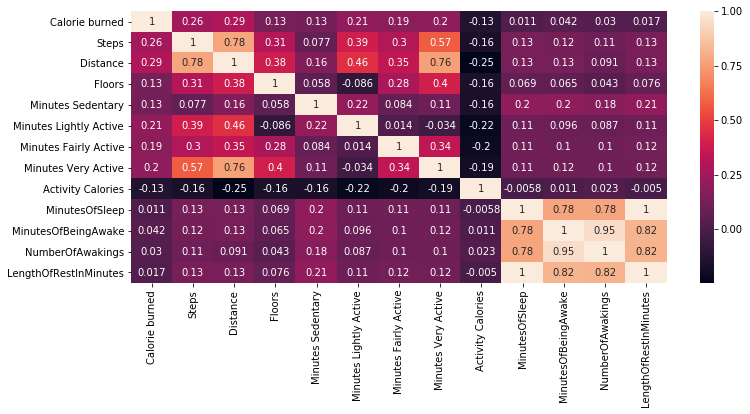

In [243]:
# create an image object with the following dimentions
plt.figure(figsize=(12,5))

# plot the results over a heatmap
sns.heatmap(fitbit_corr,
            # annotate the coeficient on the chart
           annot=True)

#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

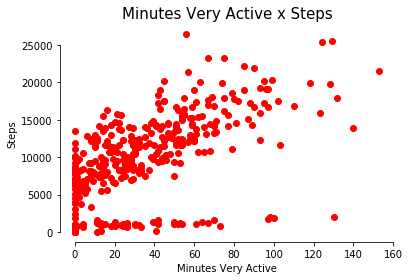

In [178]:
# remember that we have imported matplotlib.pyplot with the alias plt

plt.scatter(
    # define x column
    x=fitbit['Minutes Very Active'],
    # define y column
    y=fitbit['Steps'],
    # define the dot's color
    color='red')

plt.title('Minutes Very Active x Steps', 
          fontsize=15)

plt.xlabel('Minutes Very Active')
plt.ylabel('Steps')
sns.despine(trim=10)

In [229]:
# we can also create a function to plot a scatter plot and calculate correlations

def scatter_corr(col_x, col_y, data=fitbit):
    # scatter plot from matplotlib.pyplot
    plt.scatter(
        # define x axis column
        x=data[col_x],
        # define y axis column
        y=data[col_y],
        color='red')
    # name the title
    plt.title(col_x+' x '+col_y, 
          fontsize=15)
    # name the x axis
    plt.xlabel(col_x)
    # name the y axis
    plt.ylabel(col_y)
    # drop the chart lines
    sns.despine(
        # break the axis next to 0
        trim=True)
    # calculate Pearson's correlation: standard correlation coefficient
    peason_corr = data[col_x].corr(data[col_y])
    spearman_corr = data[col_x].corr(data[col_y],
                                     # define Spearman rank correlation as a method
                                    method='spearman')
    kendall_corr = data[col_x].corr(data[col_y],
                                     # define Kendall Tau correlation coefficient
                                    method='kendall')
    plt.show()
    return (f"Pearson's standard correlation coefficient {round(peason_corr, 2)}",
          f"Spearman rank correlation {round(spearman_corr, 2)}",
          f"Kendall Tau correlation coefficient {round(kendall_corr, 2)}")

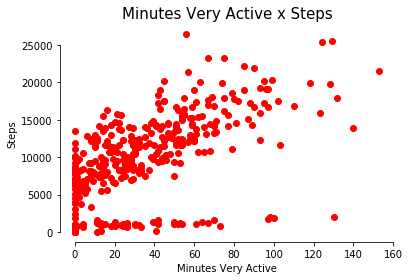

("Pearson's standard correlation coefficient 0.57",
 'Spearman rank correlation 0.63',
 'Kendall Tau correlation coefficient 0.48')

In [230]:
scatter_corr('Minutes Very Active', 'Steps')

#### What can you say about Minute Very Active and Steps? Write a comment below

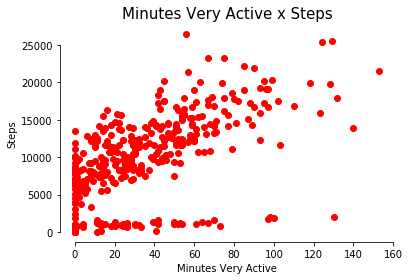

("Pearson's standard correlation coefficient 0.57",
 'Spearman rank correlation 0.63',
 'Kendall Tau correlation coefficient 0.48')

In [231]:
# calling the scatter_corr() functio that we created above
scatter_corr('Minutes Very Active', 'Steps')

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

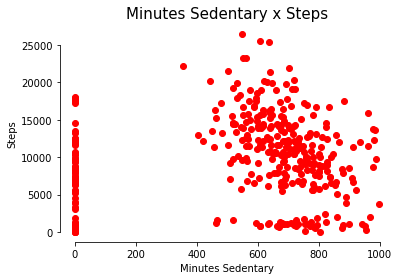

("Pearson's standard correlation coefficient 0.08",
 'Spearman rank correlation -0.12',
 'Kendall Tau correlation coefficient -0.09')

In [232]:
scatter_corr('Minutes Sedentary', 'Steps')

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

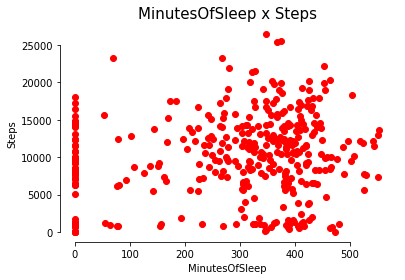

("Pearson's standard correlation coefficient 0.13",
 'Spearman rank correlation 0.09',
 'Kendall Tau correlation coefficient 0.06')

In [234]:
scatter_corr('MinutesOfSleep', 'Steps')

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [29]:
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [30]:
cor_fit = fitbit[column].corr()

In [31]:
cor_fit

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


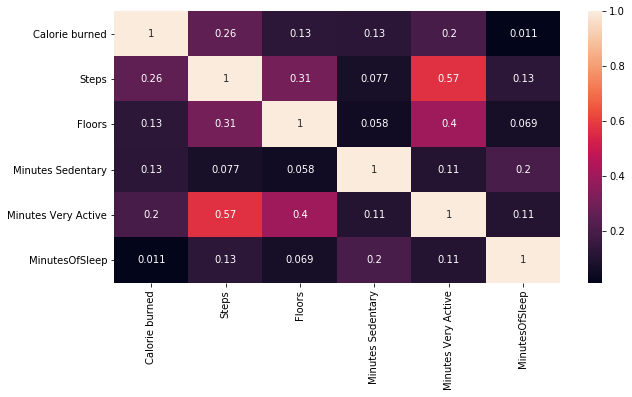

In [264]:
# define the width and height's figure
plt.figure(figsize=(10,5))

# plot a heatmap from seaborn library
sns.heatmap(cor_fit,
            # annotate coeficient on the chart
           annot=True)

#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [34]:
cor_fit.sort_values(by='Steps',ascending=False)["Steps"]

Steps                  1.000000
Minutes Very Active    0.571452
Floors                 0.306511
Calorie burned         0.255305
MinutesOfSleep         0.130986
Minutes Sedentary      0.076906
Name: Steps, dtype: float64

# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`

In [35]:
path = 'Time_Grades.csv'

In [36]:
time_grades = pd.read_csv(path)

In [37]:
time_grades.head()

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9


In [38]:
time_grades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
Name          15 non-null object
Study time    15 non-null int64
Grade         15 non-null int64
dtypes: int64(2), object(1)
memory usage: 440.0+ bytes


#### Show visually the frequency distribution of the time_grades dataset.

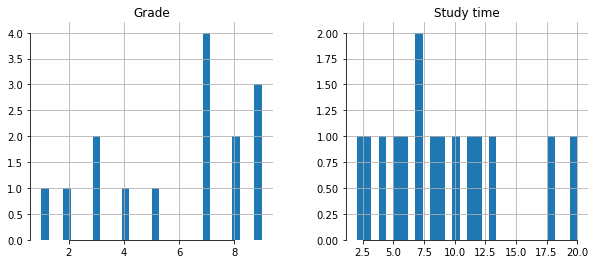

In [39]:
time_grades.hist(
    figsize=(10,4),
    bins=30)
sns.despine(trim=True)

#### Is there a correaltion between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

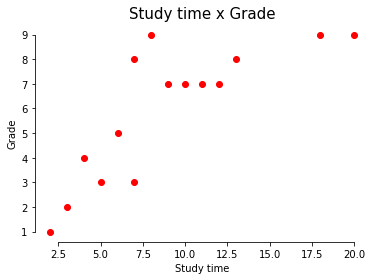

("Pearson's standard correlation coefficient 0.8",
 'Spearman rank correlation 0.82',
 'Kendall Tau correlation coefficient 0.7')

In [255]:
scatter_corr('Study time', 'Grade', data=time_grades)

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

* __Pearson's standard correlation coefficient__: 
covariance/standard deviations

![title](https://s3.amazonaws.com/acadgildsite/wordpress_images/Data+Science/Correlation+%2C+Covariance/image8.png)

"Correlation is a normalized form of covariance and not affected by scale. Both covariance and correlation measure the linear relationship between variables but cannot be used interchangeably" -- Abhay Kumar, Sept 2018.



[Source](https://acadgild.com/blog/covariance-and-correlation)

* __The Spearman's rank-order correlation__ is the nonparametric version of the Pearson product-moment correlation. Spearman's correlation coefficient, (ρ, also signified by rs) measures the strength and direction of association between two ranked variables.
[Source](https://statistics.laerd.com/statistical-guides/spearmans-rank-order-correlation-statistical-guide.php)